<a href="https://colab.research.google.com/github/aliciawill/BigData/blob/master/%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
file_path = "/content/block3.csv"
bitcoin_df = pd.read_csv(file_path, names = ['day', 'price'])

In [13]:
bitcoin_train_df = bitcoin_df.iloc[:361]
bitcoin_train_df

,day,price
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
356,2021-11-30,57828.45
357,2021-12-01,57025.79
358,2021-12-02,57229.76
359,2021-12-03,56508.48


pd.to_datetime(bitcoin_train_df['day'])

In [14]:
pd.to_datetime(bitcoin_train_df['day'])

0     2020-12-09
1     2020-12-10
2     2020-12-11
3     2020-12-12
4     2020-12-13
         ...    
356   2021-11-30
357   2021-12-01
358   2021-12-02
359   2021-12-03
360   2021-12-04
Name: day, Length: 361, dtype: datetime64[ns]

In [15]:
bitcoin_train_df['day'] = pd.to_datetime(bitcoin_train_df['day'])
bitcoin_train_df.index = bitcoin_train_df['day']
bitcoin_train_df.set_index('day', inplace=True)
bitcoin_train_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price
day,
2020-12-09,18318.87
2020-12-10,18554.15
2020-12-11,18247.76
2020-12-12,18029.36
2020-12-13,18803.44
...,...
2021-11-30,57828.45
2021-12-01,57025.79
2021-12-02,57229.76


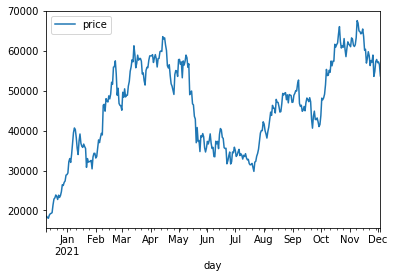

In [16]:
bitcoin_train_df.plot()
plt.show()

In [17]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
# (AR = 2, 차분 =1, MA=2) 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(bitcoin_train_df.price.values, order = (2,1,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  360
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3225.913
Method:                       css-mle   S.D. of innovations           1882.730
Date:                Thu, 09 Dec 2021   AIC                           6463.825
Time:                        13:13:29   BIC                           6487.142
Sample:                             1   HQIC                          6473.096
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.7901     99.496      0.802      0.423    -115.219     274.799
ar.L1.D.y      0.9185      0.040     23.091      0.000       0.841       0.996
ar.L2.D.y     -0.9440      0.032    -29.400      0.0

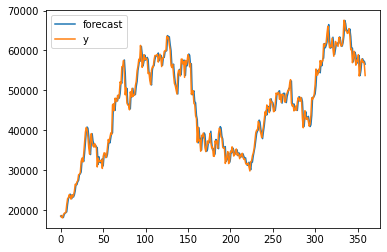

In [19]:
# 학습 데이터에 대한 예측 결과
fig = model_fit.plot_predict()

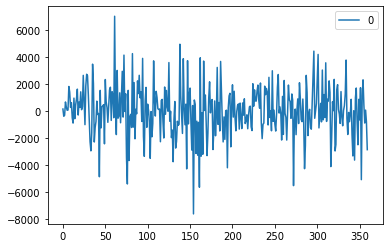

In [20]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

In [21]:
forecast_data = model_fit.forecast(steps=5) 

bitcoin_test_df = bitcoin_df[361:]
bitcoin_test_df

,day,price
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41
365,2021-12-09,50511.12


In [22]:
# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_y = forecast_data[0].tolist()

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = bitcoin_test_df.price.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

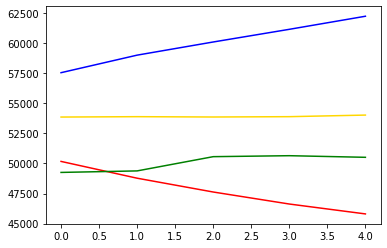

In [23]:
# 모델이 예측한 가격 그래프
plt.plot(pred_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

In [24]:
#################################

In [25]:
from fbprophet import Prophet

file_path = "/content/block3.csv"
bitcoin_df = pd.read_csv(file_path, names = ['ds', 'y'])
bitcoin_df

,ds,y
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41


In [26]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

prophet.fit(bitcoin_df)

In [27]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
366,2021-12-10,50512.869646,48192.294510,52829.136649
367,2021-12-11,51007.566222,48749.430721,53242.031561
368,2021-12-12,51222.189345,49022.841069,53524.928742
369,2021-12-13,51556.521793,49156.255931,54002.478840
370,2021-12-14,52161.984803,49421.830059,54603.458977


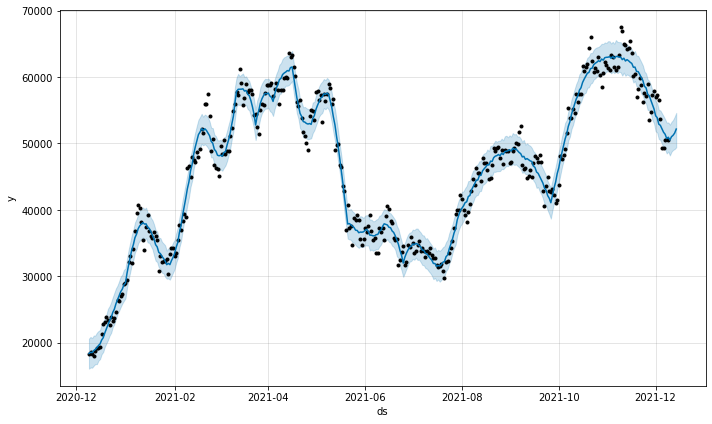

In [28]:
fig1 = prophet.plot(forecast_data)

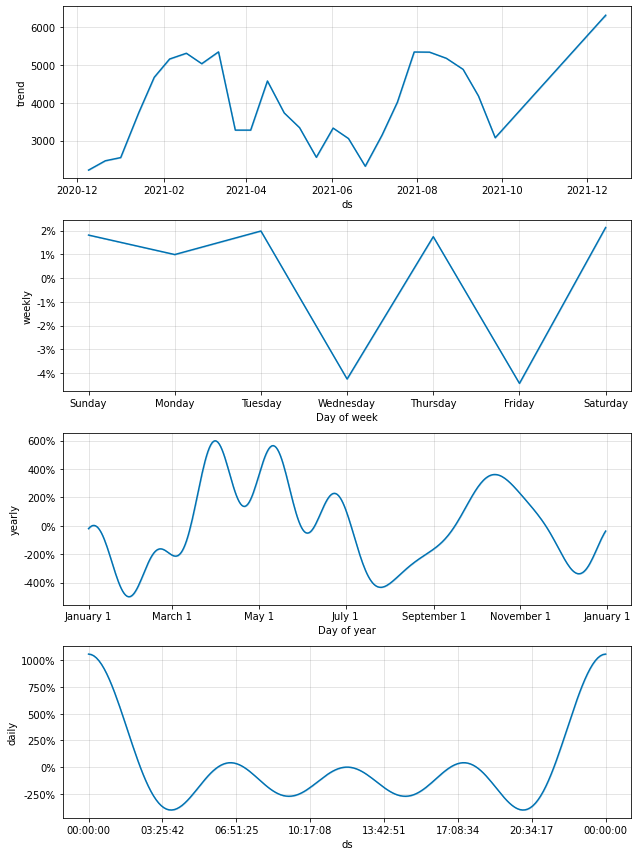

In [29]:
fig2 = prophet.plot_components(forecast_data)

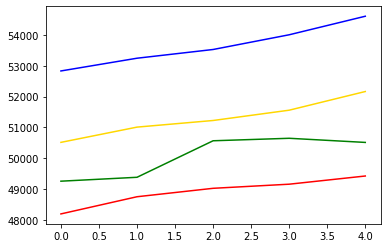

In [30]:
bitcoin_test_df = bitcoin_df[361:]

# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_y = forecast_data.yhat.values[-5:]

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = bitcoin_test_df.y.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-5:]
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-5:]
# 모델이 예측한 가격 그래프
plt.plot(pred_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

In [31]:
# 상한가 설정
bitcoin_df['cap'] = 65000

# 상한가 적용을 위한 파라미터를 다음과 같이 설정
prophet = Prophet(seasonality_mode = 'multiplicative',
                 growth = 'logistic',
                 yearly_seasonality = True,
                 weekly_seasonality = True, 
                 daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(bitcoin_df)

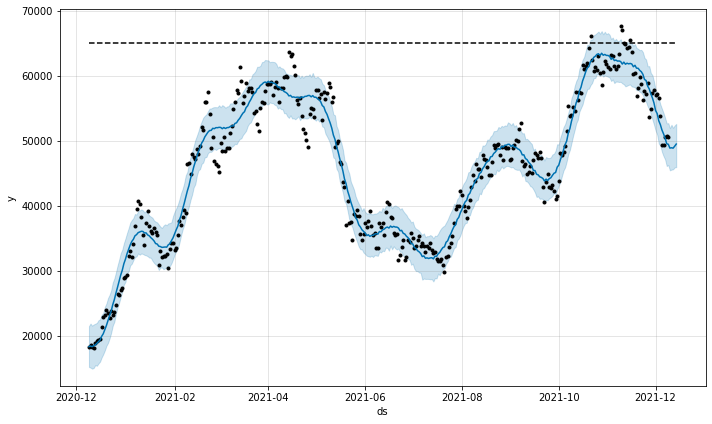

In [32]:
# 5일 예측 
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')

# 상한가 설정
future_data['cap'] = 65000
forecast_data = prophet.predict(future_data)
fig = prophet.plot(forecast_data)

In [33]:
bitcoin_df = pd.read_csv(file_path, names = ['ds','y'])
bitcoin_df.loc[bitcoin_df['y'] > 63000, 'y'] = None

# prophet 모델 학습
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality = True,
                 weekly_seasonality = True,
                 daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(bitcoin_df)

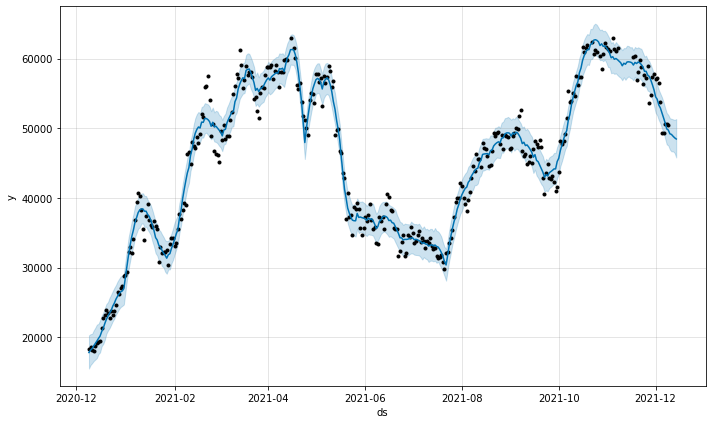

In [34]:
# 5일 예측 
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')

forecast_data = prophet.predict(future_data)
fig = prophet.plot(forecast_data)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)


1282.2278397994676
